# Chebyshev Approximation (2D)

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from scipy.fftpack import dct, dctn, fft, fft2

## Definitions

In [4]:
def chebyshev(n,x):
    
    if n == 0:
        output = 1
    elif n == 1:
        output = x
    else:
        output = 2*x*chebyshev(n-1,x) - chebyshev(n-2,x)
        
    return output
# end of chebyshev

# interpolation nodes
def cheb_nodes(n):
    output = np.zeros(n+1)
    
    for k in range(n+1):
        output[k] = np.cos( np.pi * k / n )
    # end of for loop for initializing nodes
    
    return output
# end of cheb_nodes

## Plotting

How to plot chebyshev polynomials in 2D

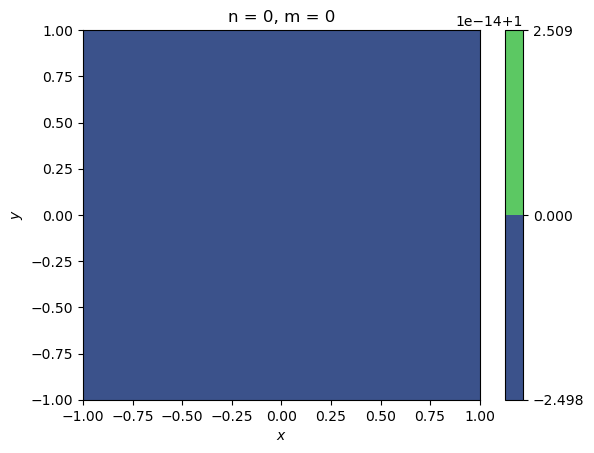

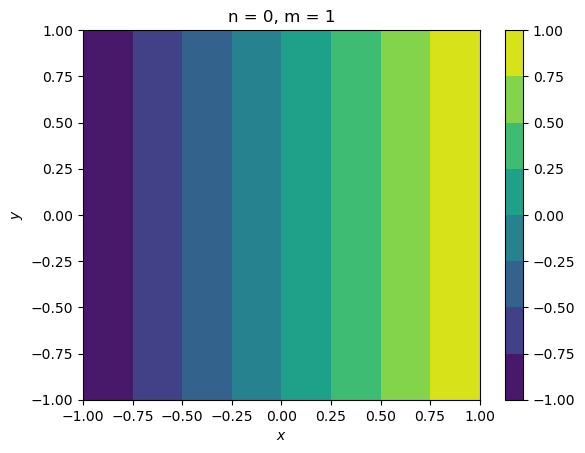

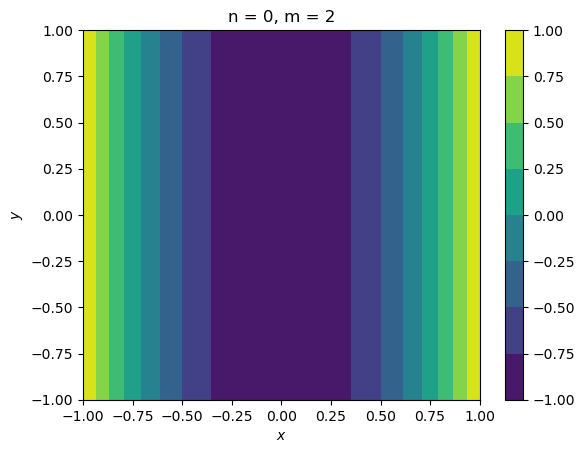

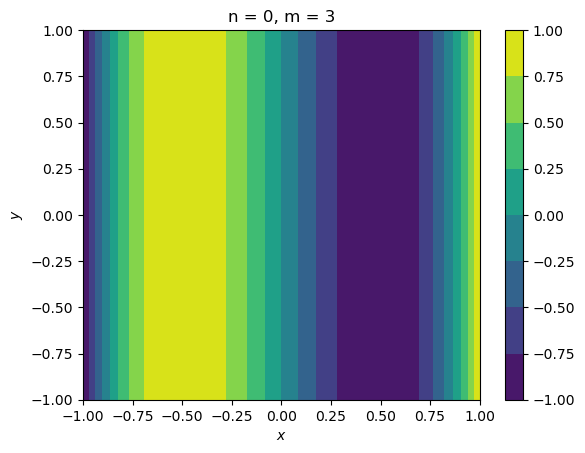

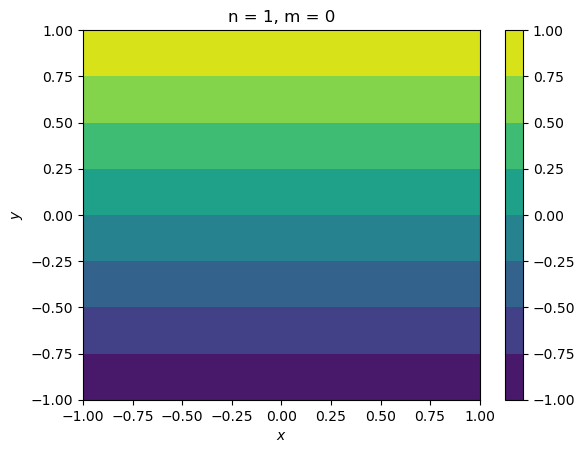

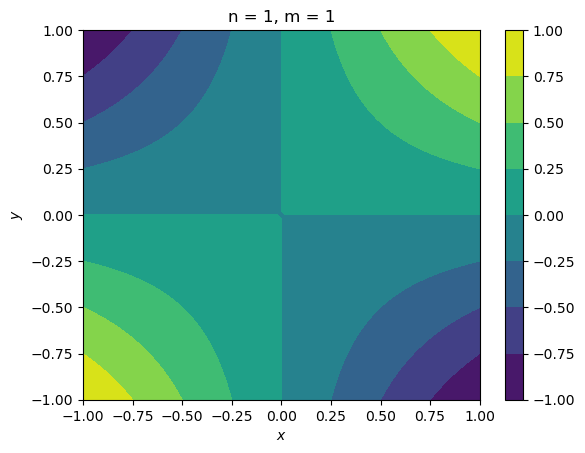

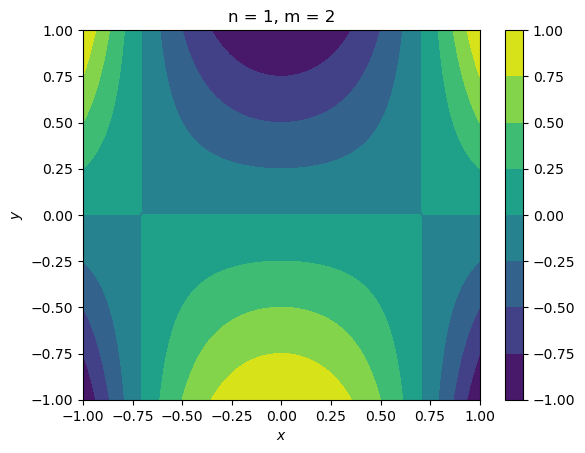

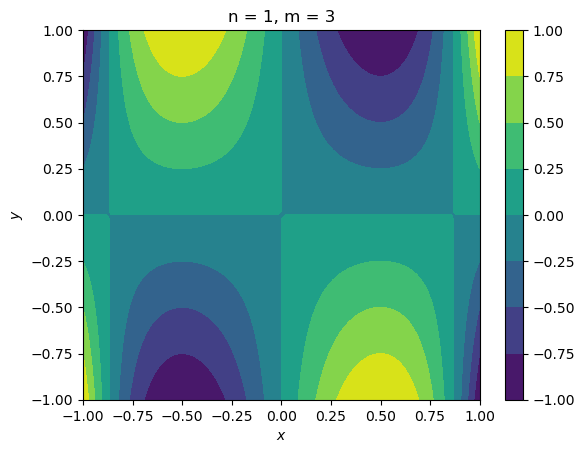

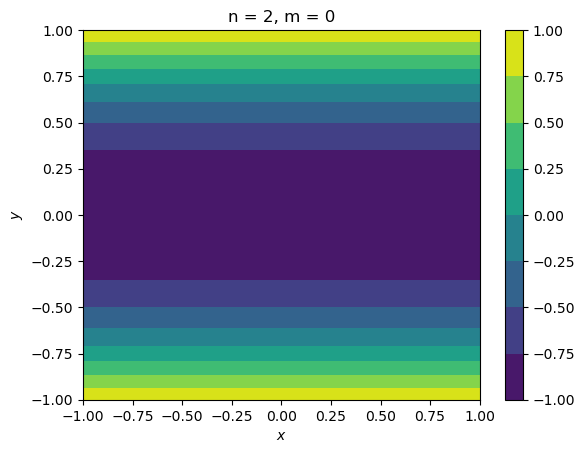

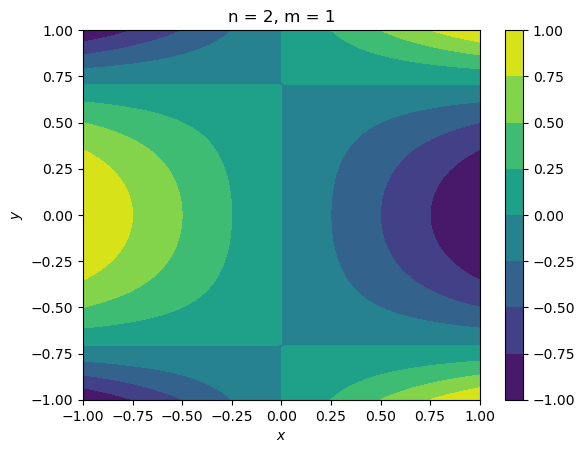

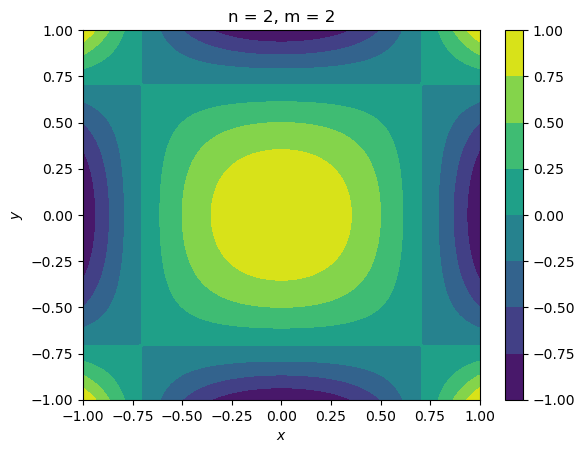

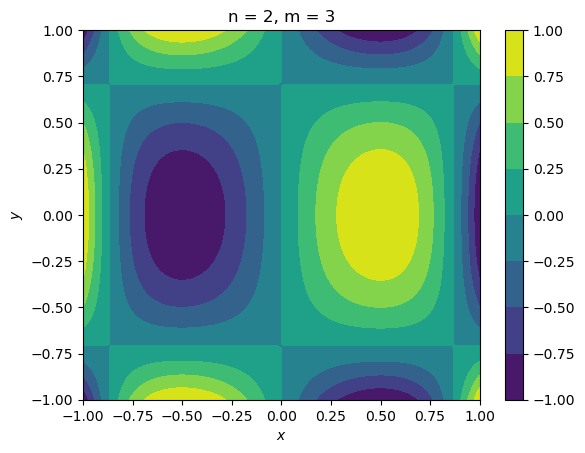

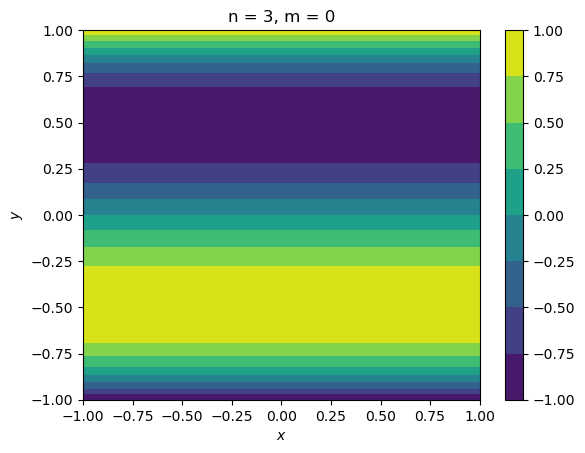

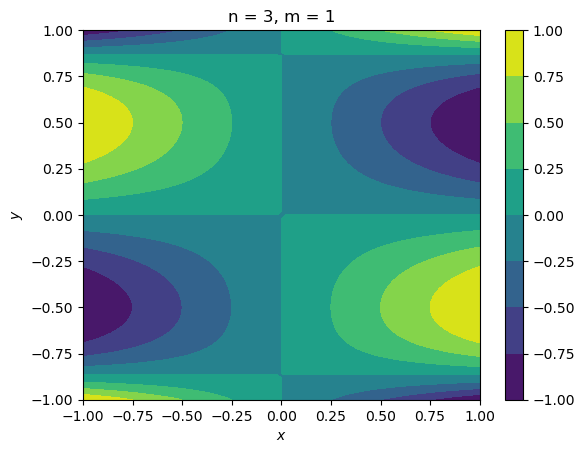

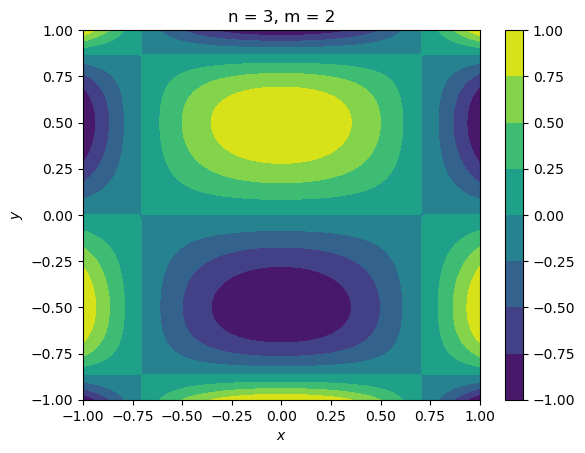

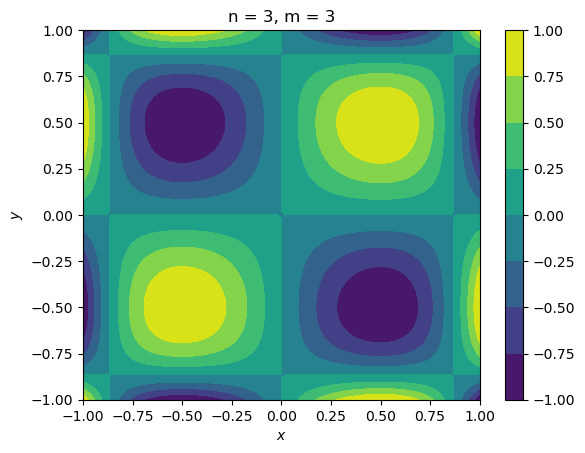

In [4]:
M = 100
N = 3
for n in range(N+1):
    for m in range(N+1):
        x = np.linspace(-1,1,M+1)
        y = np.linspace(-1,1,M+1)
        X, Y = np.meshgrid(x,y)

        T = np.zeros((M+1,M+1))

        for i in range(M+1):
            for j in range(M+1):
                T[i,j] = chebyshev(n,x[i]) * chebyshev(m,y[j])
            # end of for loop in j
        # end of for loop in i

        plt.contourf(X,Y,T)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.colorbar()
        plt.title('n = ' + str(n) + ', m = ' + str(m))
        plt.show()
    # end of for loop in m
# end of for loop in n

## Chebyshev interpolation

Direct function evaluation

In [5]:
# direct evaluation of f
def cheb_approx_2D_1(f,N,x,y):
    w = 4*np.ones((N+1,N+1))
    # manually fix 
    w[0,:] = w[0,:] / 2
    w[-1,:] = w[-1,:] / 2
    w[:,0] = w[:,0] / 2
    w[:,-1] = w[:,-1] / 2
    
    f_hat = np.zeros((N+1,N+1))
    
    for k1 in range(N+1):
        for k2 in range(N+1):
            A = 0 # running sum 
            
            for j1 in range(N+1):
                for j2 in range(N+1):
                    A += w[j1,j2] * f( np.cos(np.pi*j1/N) , np.cos(np.pi*j2/N) ) * np.cos(np.pi*j1*k1/N) * np.cos(np.pi*j2*k2/N)
                # end of sum over j2
            # end of sum over j1
            
            f_hat[k1,k2] = w[k1,k2] * A / (4*N**2)
        # end of for loop in k2
    # end of for loop in k1
    
    B = 0 # running sum
    for j in range(N+1):
        for k in range(N+1):
            B += f_hat[j,k] * chebyshev(j,x) * chebyshev(k,y)
        # end of sum over k
    # end of sum over j
    
    return B
# end of cheb_approx_2D_1

SciPy's FFT

In [19]:
def cheb_approx_2D_2(f,N,x,y):
    f_values = np.zeros((N+1,N+1))
    for j in range(N+1):
        for k in range(N+1):
            f_values[j,k] = f(cheb_nodes(N)[j],cheb_nodes(N)[k])
    # end of for loop to initialize f_values
    
    f_coeffs = dctn(f_values,type=1).real / (N)**2 # normalization
    
    # manually input
    f_coeffs[0,:] = f_coeffs[0,:] / 2
    f_coeffs[-1,:] = f_coeffs[-1,:] / 2
    f_coeffs[:,0] = f_coeffs[:,0] / 2
    f_coeffs[:,-1] = f_coeffs[:,-1] / 2
    
    A = 0 # runing sum
    
    for j in range(N+1):
        for k in range(N+1):
            A += f_coeffs[j,k]*chebyshev(j,x)*chebyshev(k,y)
    # end of sum over j and k

    return A
# end of cheb_approx_2D_2

Plotting and testing

In [20]:
def cheb_2D_plotter(f,N,M,mode):
    x = np.linspace(-1,1,M+1)
    y = np.linspace(-1,1,M+1)
    X, Y = np.meshgrid(x,y)
    
    # f values
    F = np.zeros((M+1,M+1))
    for i in range(M+1):
        for j in range(M+1):
            F[i,j] = f(x[i],y[j])
    # end of for loop for F
    
    # interpolant
    P = np.zeros((M+1,M+1))
    
    if mode == 0:
        for i in range(M+1):
            for j in range(M+1):
                P[i,j] = cheb_approx_2D_1(f,N,x[i],y[j])
        # end of for loop for P
    elif mode == 1:
        for i in range(M+1):
            for j in range(M+1):
                P[i,j] = cheb_approx_2D_2(f,N,x[i],y[j])
        # end of for loop for P
    else:
        raise Exception('Ooff')
    # end of if-else conditional
    
    plt.contourf(X,Y,P)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.colorbar()
    plt.title('$N$ = ' + str(N))
    plt.show()
    
    return np.amax(np.abs(F-P))
# end of of cheb_2D_plotter

Example

In [47]:
# norm
def f(x,y):
    return np.sqrt(x**2 + y**2)
# end of f

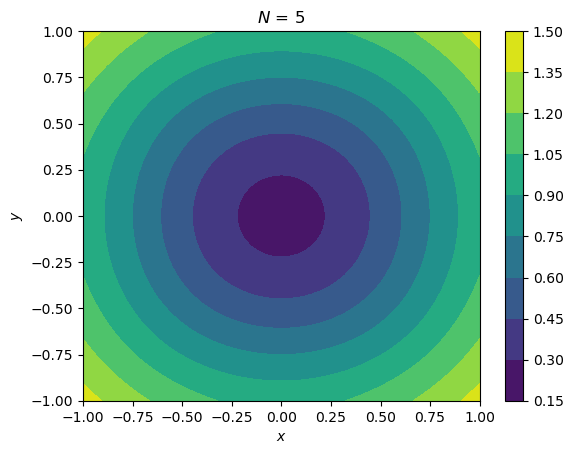

0.24752541643734907
Runtime = 17.381347500000004


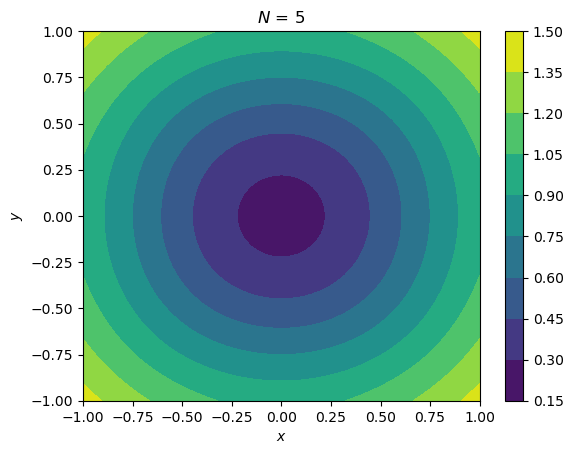

0.24752541643734924
Runtime = 2.01660609999999


In [9]:
M = 50
N = 5
for mode in range(2):
    start = timer()
    print(cheb_2D_plotter(f,N,M,mode))
    stop = timer()
    time = stop - start
    print('Runtime = ' + str(time))
# end of for loop in mode

17 seconds vs. 2 seconds? There is no comparison!

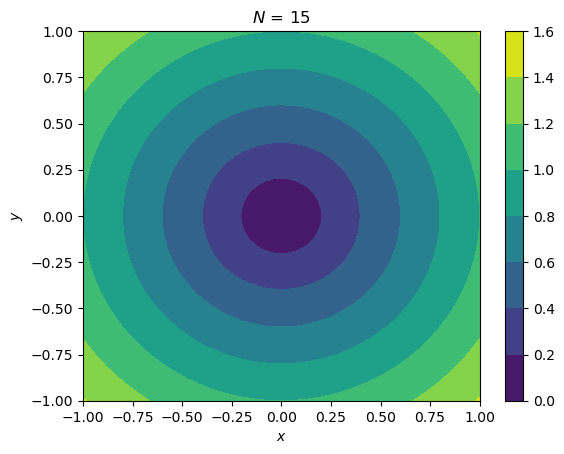

0.08159352344628557
Runtime = 133.12399569997797


In [55]:
M = 50
N = 15
mode = 1

start = timer()
print(cheb_2D_plotter(f,N,M,mode))
stop = timer()
time = stop - start

print('Runtime = ' + str(time))

Let's see if we can improve anything

In [51]:
def cheb_2D(f,N,M):
    f_values = np.zeros((N+1,N+1))
    for j in range(N+1):
        for k in range(N+1):
            f_values[j,k] = f(cheb_nodes(N)[j],cheb_nodes(N)[k])
    # end of for loop to initialize f_values
    
    f_coeffs = dctn(f_values,type=1).real / (N)**2 # normalization
    
    # manually input
    f_coeffs[0,:] = f_coeffs[0,:] / 2
    f_coeffs[-1,:] = f_coeffs[-1,:] / 2
    f_coeffs[:,0] = f_coeffs[:,0] / 2
    f_coeffs[:,-1] = f_coeffs[:,-1] / 2
    
    x = np.linspace(-1,1,M+1)
    y = np.linspace(-1,1,M+1)
    
    # f values
    F = np.zeros((M+1,M+1))
    for i in range(M+1):
        for j in range(M+1):
            F[i,j] = f(x[i],y[j])
    # end of for loop for F
    
    # interpolant
    P = np.zeros((M+1,M+1))
    
    for i in range(M+1):
        for j in range(M+1):
            A = 0 # running sum
            
            for k in range(N+1):
                for l in range(N+1):
                    A += f_coeffs[k,l]*chebyshev(k,x[i])*chebyshev(l,y[j])
            # end of sum over k and l
            
            P[i,j] = A
    # end of for loop for P
    
    return np.amax(np.abs(F - P))
# end of cheb_2D

Barycentric Formula

In [46]:
def cheb_approx_2D_3(f,N,x,y):
    tol = 10**(-6)
    X = cheb_nodes(N)
    Y = cheb_nodes(N)
    f_values = np.zeros((N+1,N+1))
    for n in range(N+1):
        for m in range(N+1):
            f_values[n,m] = f(X[n],Y[m])
    # end of for loop to initialize f_values
    
    # barycentric weights
    Lambda = np.zeros(N+1)
    for n in range(N+1):
        Lambda[n] = (-1)**n
    # end of for loop to initialize Lambda
    
    # manually input
    Lambda[0] = Lambda[0] / 2
    Lambda[-1] = Lambda[-1] / 2
    
    output = 0
    
    # OK, so I have no idea how to generalize the barycentric formula to higher dimensions.
    # tolerance testing
    
    # use infinity norm 
    dist = np.zeros((N+1,N+1))
    for n in range(N+1):
        for m in range(N+1):
            dist[n,m] = np.amax([np.abs(x-X[n]),np.abs(y-Y[m])])
    # end of for loop to compute distances
    
    if np.amin(dist) < tol:
        # (x,y) is too close to a node, so return interpolated value to closest node
        min_indices = np.argmin(dist,axis=0)
        output = f_values[min_indices[0],min_indices[1]]
    else:
        # running sum 
        Ax = 0; Bx = 0; Ay = 0; By = 0;
        
        for n in range(N+1):
            Ax += Lambda[n] / (x - X[n])
            Bx += f_values[n] * Lambda[n] / (x - X[n])
            Ay += Lambda[n] / (y - Y[n])
            By += f_values[n] * Lambda[n] / (y - Y[n])
        # end of sum in n
        output = (Bx / Ax) * (By / Ay)
    # end of if-else statement for checking if x is too close to a node
    
    return output
# end of cheb_approx_2D_3

In [45]:
A = 0; B = 0; C = 0; D = 0;
print(A)

0


In [54]:
N = 15
M = 50

start = timer()
cheb_2D(f,N,M)
stop = timer()
time = stop - start

print('Runtime = ' + str(time))

Runtime = 132.94603520003147


Error analysis

In [41]:
def error_analysis(f,N,M):
    x = np.linspace(-1,1,M+1)
    y = np.linspace(-1,1,M+1)
    
    error = np.zeros(N+1)
    F = np.zeros((M+1,M+1))
    
    # initialize f values
    for i in range(M+1):
        for j in range(M+1):
            F[i,j] = f(x[i],y[j])
    # end of for loop for F
    
    for n in range(len(error)):
        P = np.zeros((M+1,M+1))
        
        for i in range(M+1):
            for j in range(M+1):
                P[i,j] = cheb_approx_2D_2(f,2**n,x[i],y[j]) # try powers of 2
        # end of for loop for F
        
        error[n] = np.amax(np.abs(F-P))
    # end of for loop in n
    
    plt.semilogy()
    plt.xlabel('Total coordinate degree (powers of 2)')
    plt.ylabel('Maximum error (log scale)')
    plt.stem(np.linspace(0,N,N+1),error)
# end of error_analysis

Runtime = 36.79281359999732


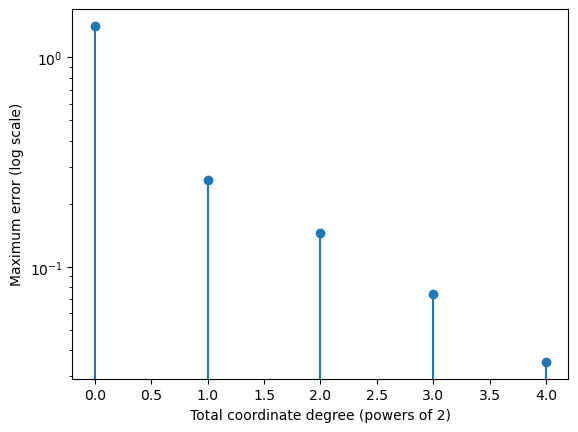

In [40]:
M = 20
N = 4
start = timer()
error_analysis(f,N,M)
stop = timer()
time = stop - start
print('Runtime = ' + str(time))

try with powers of 2, smooth functions, barycentric, Rivlin, Chebfun

Test for smoothness

In [13]:
def test_for_smoothness(s,N,M):
    
    # function that is only C^s
    def f_test(s,x,y):
        if s == 0:
            return 1
        elif s == 1: 
            return np.sqrt(x**2 + y**2)
        else:
            return np.sqrt(x**2 + y**2) * (x**2 + y**2)**(s-1) / (s**2)
        # end of if-else statement for s
    # end of f_test
    
    # cheb_approx 
    def cheb_approx_for_this_test(s,N,x,y):
        nodes = cheb_nodes(N)
        f_values = np.zeros((N+1,N+1))
        for j in range(N+1):
            for k in range(N+1):
                f_values[j,k] = f_test(s,nodes[j],nodes[k])
        # end of for loop to initialize f_values

        f_coeffs = dctn(f_values,type=1).real / (N)**2 # normalization

        # manually input
        f_coeffs[0,:] = f_coeffs[0,:] / 2
        f_coeffs[-1,:] = f_coeffs[-1,:] / 2
        f_coeffs[:,0] = f_coeffs[:,0] / 2
        f_coeffs[:,-1] = f_coeffs[:,-1] / 2

        A = 0 # runing sum

        for j in range(N+1):
            for k in range(N+1):
                A += f_coeffs[j,k]*chebyshev(j,x)*chebyshev(k,y)
        # end of sum over j and k

        return A
    # end of cheb_approx_for_this_test
    
    x = np.linspace(-1,1,M+1)
    y = np.linspace(-1,1,M+1)
    
    error = np.zeros(s+1)
    
    for k in range(s+1):
        F = np.zeros((M+1,M+1))
        P = np.zeros((M+1,M+1))
        
        for i in range(M+1):
            for j in range(M+1):
                F[i,j] = f_test(k,x[i],y[j])
                P[i,j] = cheb_approx_for_this_test(k,N,x[i],y[j])
        # end of for loop in i and j
        
        error[k] = np.amax(np.abs(F-P))
    # end of for loop in n
    
    plt.semilogy()
    plt.xlabel('Order of derivatives')
    plt.ylabel('Error (log scale)')
    plt.stem(np.linspace(0,s,s+1),error)
    plt.title('Maximum coordinatewise degree of interpolant $N$ = ' + str(N))
# end of test_for_smoothness

Runtime = 494.6534157


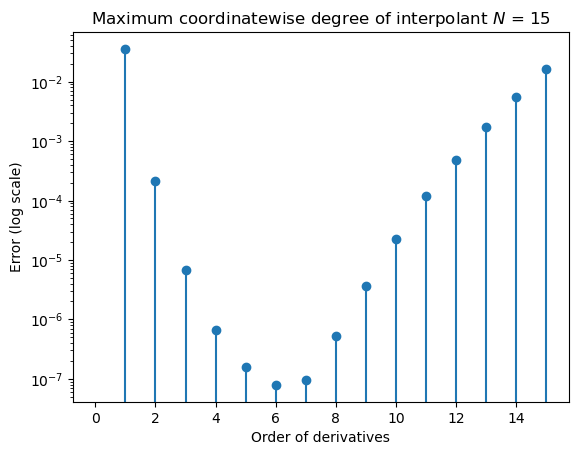

In [14]:
M = 25
N = 15
s = 15

start = timer()
test_for_smoothness(s,N,M)
stop = timer()
time = stop - start
print('Runtime = ' + str(time))

## 3D and higher?

Let's try and copy what we did for 2D

In [1]:
def cheb_approx_3D(f,N,x,y,z):
    f_values = np.zeros((N+1,N+1,N+1))
    for i in range(N+1):
        for j in range(N+1):
            for k in range(N+1):
                f_values[i,j,k] = f(cheb_nodes(N)[i],cheb_nodes(N)[j],cheb_nodes(N)[k])
    # end of for loop to initialize f_values
    
    f_coeffs = dctn(f_values,type=1).real / (N)**3 # normalization
    
    # manually input
    f_coeffs[0,:,:] = f_coeffs[0,:,:] / 2
    f_coeffs[-1,:,:] = f_coeffs[-1,:,:] / 2
    f_coeffs[:,0,:] = f_coeffs[:,0,:] / 2
    f_coeffs[:,-1,:] = f_coeffs[:,-1,:] / 2
    f_coeffs[:,:,0] = f_coeffs[:,:,0] / 2
    f_coeffs[:,:,-1] = f_coeffs[:,:,-1] / 2
    
    A = 0 # runing sum
    
    for i in range(N+1):
        for j in range(N+1):
            for k in range(N+1):
                A += f_coeffs[i,j,k]*chebyshev(i,x)*chebyshev(j,y)*chebyshev(k,y)
    # end of sum over i, j and k

    return A
# end of cheb_approx_3D

In [2]:
def cheb_3D_tester(f,N,M):
    x = np.linspace(-1,1,M+1)
    y = np.linspace(-1,1,M+1)
    z = np.linspace(-1,1,M+1)
    
    # f values
    F = np.zeros((M+1,M+1,M+1))
    for i in range(M+1):
        for j in range(M+1):
            for k in range(M+1):
                F[i,j,k] = f(x[i],y[j],z[k])
    # end of for loop for F
    
    # interpolant
    P = np.zeros((M+1,M+1,M+1))
    
    for i in range(M+1):
        for j in range(M+1):
            for k in range(M+1):
                P[i,j,k] = cheb_approx_3D(f,N,x[i],y[j],z[k])
    # end of for loop for P
    
    return np.amax(np.abs(F-P))
# end of of cheb_3D_tester

In [3]:
def f(x,y,z):
    return np.sqrt(x**2 + y**2 + z**2)

In [11]:
N = 5
M = 20 

start = timer()
print(cheb_3D_tester(f,N,M))
stop = timer()
time = stop - start
print('Runtime = ' + str(time))

0.7226424065836852
Runtime = 46.48880790000112
